# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'

In [ ]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [ ]:
# set to true if you want to train the model,
# false if you want to load a previously trained model
train = True

# set to true if you want to output the graphs
graph = True

# set to true if you want to unnormalize data at the end
unnormalize = False

In [ ]:
# normalized data

ECG_Normalized = np.load(f'{drive_path}/Task_3_4_Data_norm/ECG_Data_NORM.npy')
VmData_Normalized = np.load(f'{drive_path}/Task_3_4_Data_norm/VmData_NORM.npy')

X = ECG_Normalized
Y = VmData_Normalized

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
if (train):
  model = Sequential()

  model.add(Conv1D(64, 8, activation='relu', strides = 1, padding = 'same', input_shape=(500, 12)))

  model.add(tf.keras.layers.AveragePooling1D(pool_size = 5, strides = 1, padding = 'same'))


  model.add(Conv1D(75, 6, activation='relu', strides = 1, padding = 'same'))

  model.add(tf.keras.layers.AveragePooling1D(pool_size = 5, strides = 1, padding = 'same'))


  model.add(Conv1D(112, 8, activation='relu', strides = 1, padding = 'same'))

  model.add(tf.keras.layers.AveragePooling1D(pool_size = 6, strides = 1, padding = 'same'))


  model.add(Conv1D(150, 25, activation='relu', strides = 1, padding = 'same'))

  model.add(MaxPooling1D(pool_size=3, strides = 1, padding = 'same'))


  model.add(Dropout(0.1))


  model.add(Conv1D(256, 14, activation='relu', strides = 1, padding = 'same'))

  model.add(tf.keras.layers.AveragePooling1D(pool_size = 24, strides = 1, padding = 'same'))


  model.add(Conv1D(75, 16, activation='relu', strides = 1, padding = 'same'))

  model.add(tf.keras.layers.AveragePooling1D(pool_size = 5, strides = 1, padding = 'same'))


  model.compile(loss='mean_absolute_error', optimizer='adam')

  model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 500, 64)           6208      
                                                                 
 average_pooling1d_18 (Avera  (None, 500, 64)          0         
 gePooling1D)                                                    
                                                                 
 conv1d_22 (Conv1D)          (None, 500, 75)           28875     
                                                                 
 average_pooling1d_19 (Avera  (None, 500, 75)          0         
 gePooling1D)                                                    
                                                                 
 conv1d_23 (Conv1D)          (None, 500, 112)          67312     
                                                                 
 average_pooling1d_20 (Avera  (None, 500, 112)        

In [ ]:
if (train):
  model.fit(X_train, y_train, epochs = 150, batch_size = 32)
  # model.save(f'{drive_path}/trained_models/shaan_task4_model.h5')
else:
  model = tf.keras.models.load_model(f'{drive_path}/trained_models/shaan_task4_model.h5')

Epoch 1/150
403/403 [==============================] - 6s 15ms/step - loss: 0.1020
Epoch 2/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0579
Epoch 3/150
403/403 [==============================] - 6s 14ms/step - loss: 0.0533
Epoch 4/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0519
Epoch 5/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0503
Epoch 6/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0495
Epoch 7/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0489
Epoch 8/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0484
Epoch 9/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0478
Epoch 10/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0472
Epoch 11/150
403/403 [==============================] - 6s 15ms/step - loss: 0.0468
Epoch 12/150
403/403 [==============================] - 7s 16ms/step - loss: 0.0466
E

In [ ]:
preds = model.predict(X_test)

101/101 [==============================] - 1s 6ms/step


In [ ]:
# if (train):
#   model.save(f'{drive_path}/trained_models/shaan_task4_model.h5')

In [ ]:
from sklearn.metrics import r2_score

# average r2 score of each sample since the dimensions aren't right

r2=0
for i in range(y_test.shape[0]):
  r2 += r2_score(y_test[i], preds[i])

r2 /= y_test.shape[0]

print("Average R² score of each sample:", r2)

Average R² score of each sample: 0.9190512998188896


In [ ]:
if(unnormalize):
  def vm_unnorm(norm_vm, min_vm, max_vm):

    vm_unnorm = np.zeros((norm_vm.shape[0], norm_vm.shape[1], norm_vm.shape[2]))

    for i, heart in enumerate(norm_vm):
      for j, mapping in enumerate(heart):
        for k, scaled_voltage in enumerate(mapping):
          temp_min = min_vm[k]
          temp_max = max_vm[k]
          original = scaled_voltage * (temp_max - temp_min) + temp_min
          vm_unnorm[i][j][k] = original

    return vm_unnorm

  # unnormalize
  VMData = np.load(f'{drive_path}/Task_3_4_Data/VmData.npy')
  mins = np.amin(VMData, axis=(0,1))
  maxs = np.amax(VMData, axis=(0,1))

  not_norm_preds = vm_unnorm(preds, mins, maxs)
  not_norm_y_test = vm_unnorm(y_test, mins, maxs)

  preds = not_norm_preds
  y_test = not_norm_y_test

In [ ]:
# graph VmData for a single sample (given in the getting started notebook)

def VmGraph(VmData):
  plt.figure(figsize=(18, 9))
  num_timesteps = 500

  for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
  plt.tight_layout()
  plt.show()
  # close
  plt.close()

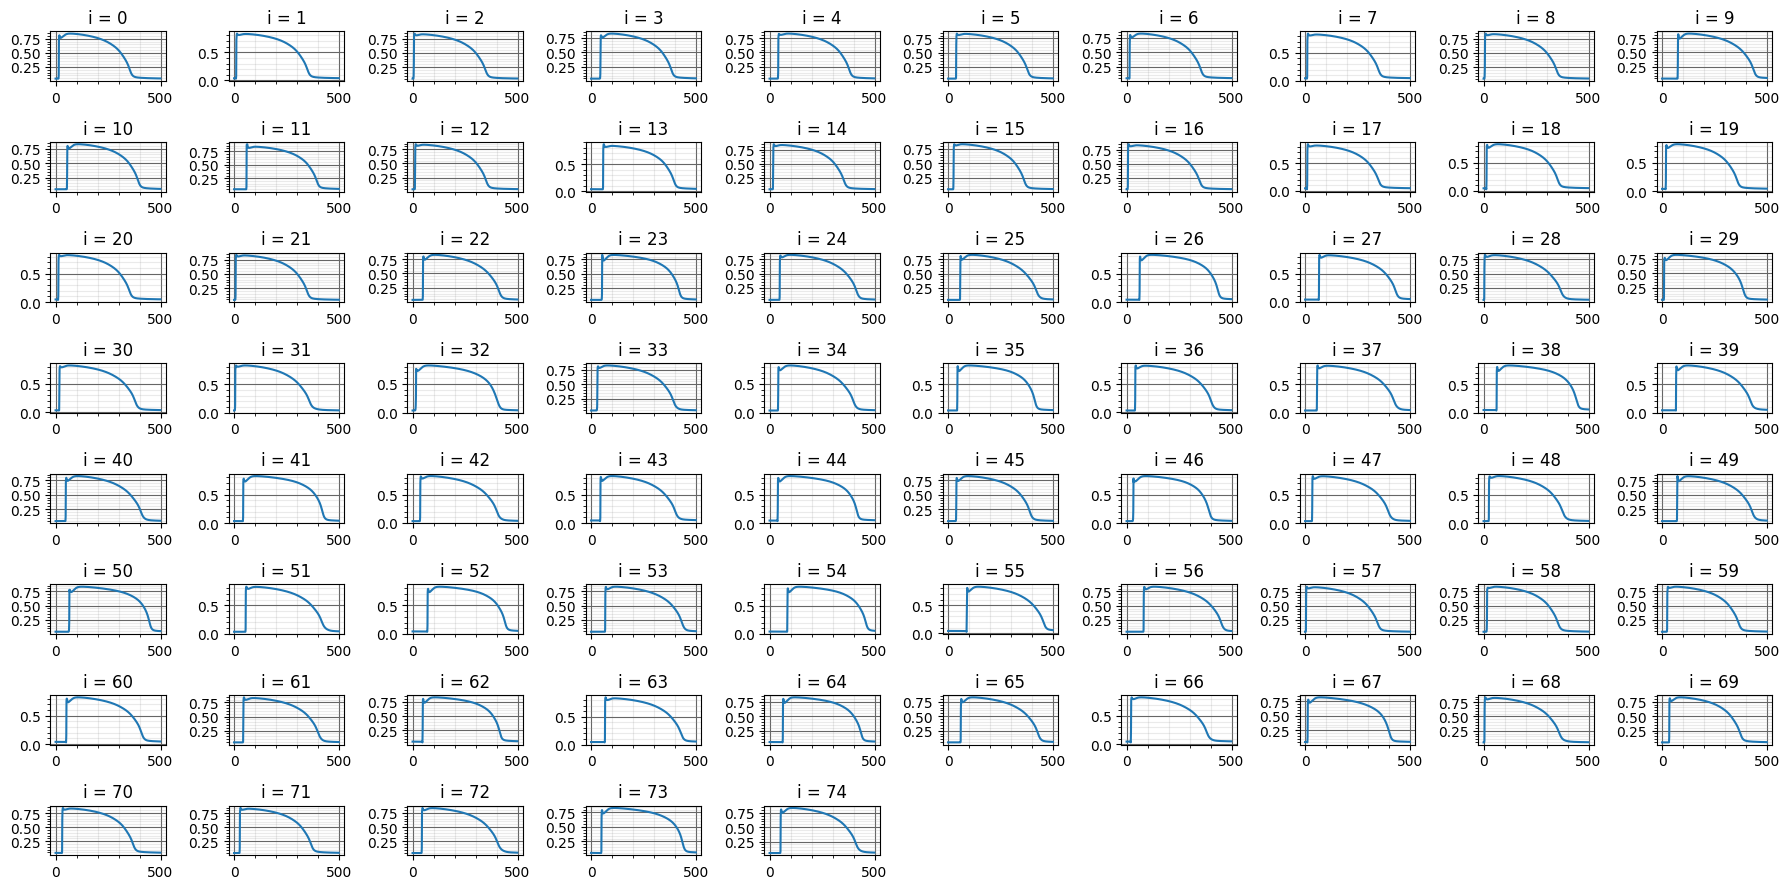

In [ ]:
if (graph):
  # graph of true first sample

  VmGraph(y_test[0])


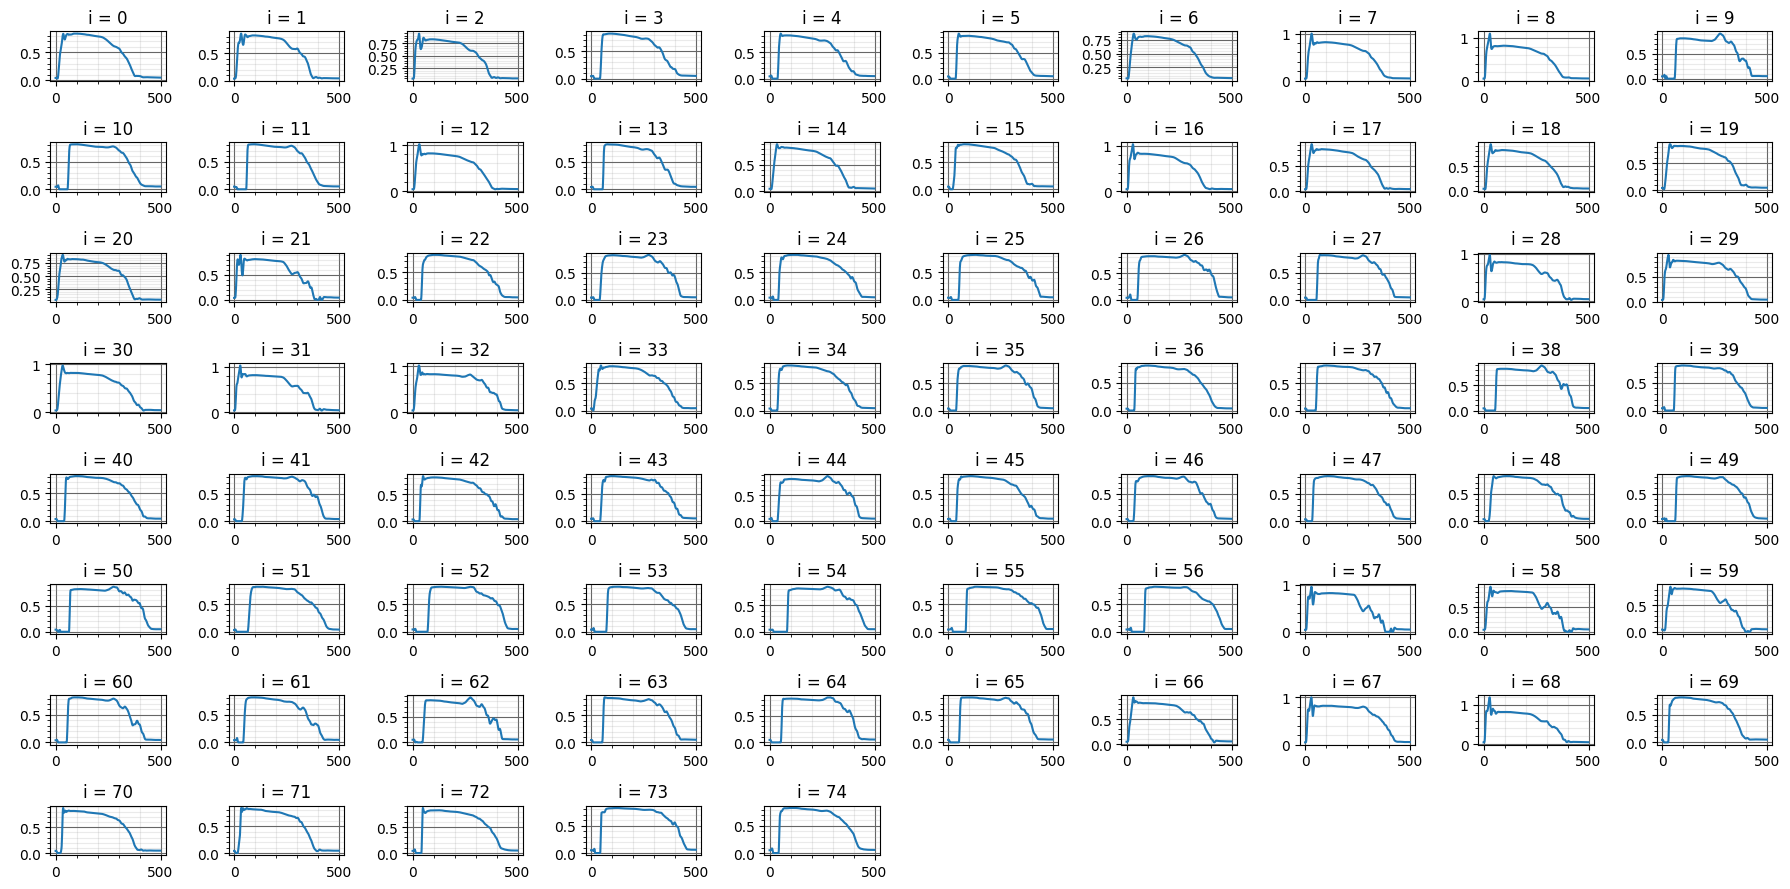

In [ ]:
if (graph):
  # graph of prediction of first sample

  VmGraph(preds[0])

In [ ]:
diff = abs(preds - y_test)

In [ ]:
# if (graph):
#   # graph of difference between prediction and actual value for first sample

#   VmGraph(diff[0])

In [ ]:
avgDiff = diff.mean()
if(unnormalize):
  print(f'Average Difference: {str(avgDiff)[:5]} ms')
else:
  print(f'Average Difference: {str(avgDiff)[:6]} (normalized data)')

Average Difference: 0.0370 (normalized data)


In [ ]:
if (graph):
  box_plots(preds, y_test)

KeyboardInterrupt: ignored

In [ ]:
def R2(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.truediv(residual, total))
  return r2

In [ ]:
tf.keras.utils.get_custom_objects().update({'R2': R2})
bpardi_model = tf.keras.models.load_model(f'{drive_path}/trained_models/task_4_mapping_skip_connections_R2.9563.h5') # sc_model

In [ ]:
preds = bpardi_model.predict(X_test)

101/101 [==============================] - 8s 6ms/step


In [ ]:
def vm_unnorm(norm_vm, min_vm, max_vm):

  vm_unnorm = np.zeros((norm_vm.shape[0], norm_vm.shape[1], norm_vm.shape[2]))

  for i, heart in enumerate(norm_vm):
    for j, mapping in enumerate(heart):
      for k, scaled_voltage in enumerate(mapping):
        temp_min = min_vm[k]
        temp_max = max_vm[k]
        original = scaled_voltage * (temp_max - temp_min) + temp_min
        vm_unnorm[i][j][k] = original

  return vm_unnorm

# unnormalize
VMData = np.load(f'{drive_path}/Task_3_4_Data/VmData.npy')
mins = np.amin(VMData, axis=(0,1))
maxs = np.amax(VMData, axis=(0,1))

not_norm_preds = vm_unnorm(preds, mins, maxs)
not_norm_y_test = vm_unnorm(y_test, mins, maxs)

preds = not_norm_preds
y_test = not_norm_y_test

In [ ]:
def box_plots(predictions, y_values):
  import seaborn as sns
  import pandas as pd

  transposed_preds = np.transpose(predictions, (0, 2, 1))
  transposed_Y = np.transpose(y_values, (0, 2, 1))

  transposed_diff = abs(transposed_Y - transposed_preds)

  df = pd.DataFrame([], range(transposed_preds.shape[0]) ,range(1, transposed_preds.shape[1]+1))

  for sample in range(transposed_diff.shape[0]):
    for point in range(1, transposed_diff.shape[1]+1):
      df[(point)][sample] = transposed_diff[sample][point-1].mean()

  df

  # plt.figure(figsize=(24,12))
  # sns.boxplot(data=df, orient = 'v').set(title='Average Difference for each Myocardial Point')
  # plt.ylabel('Difference in Milliseconds')

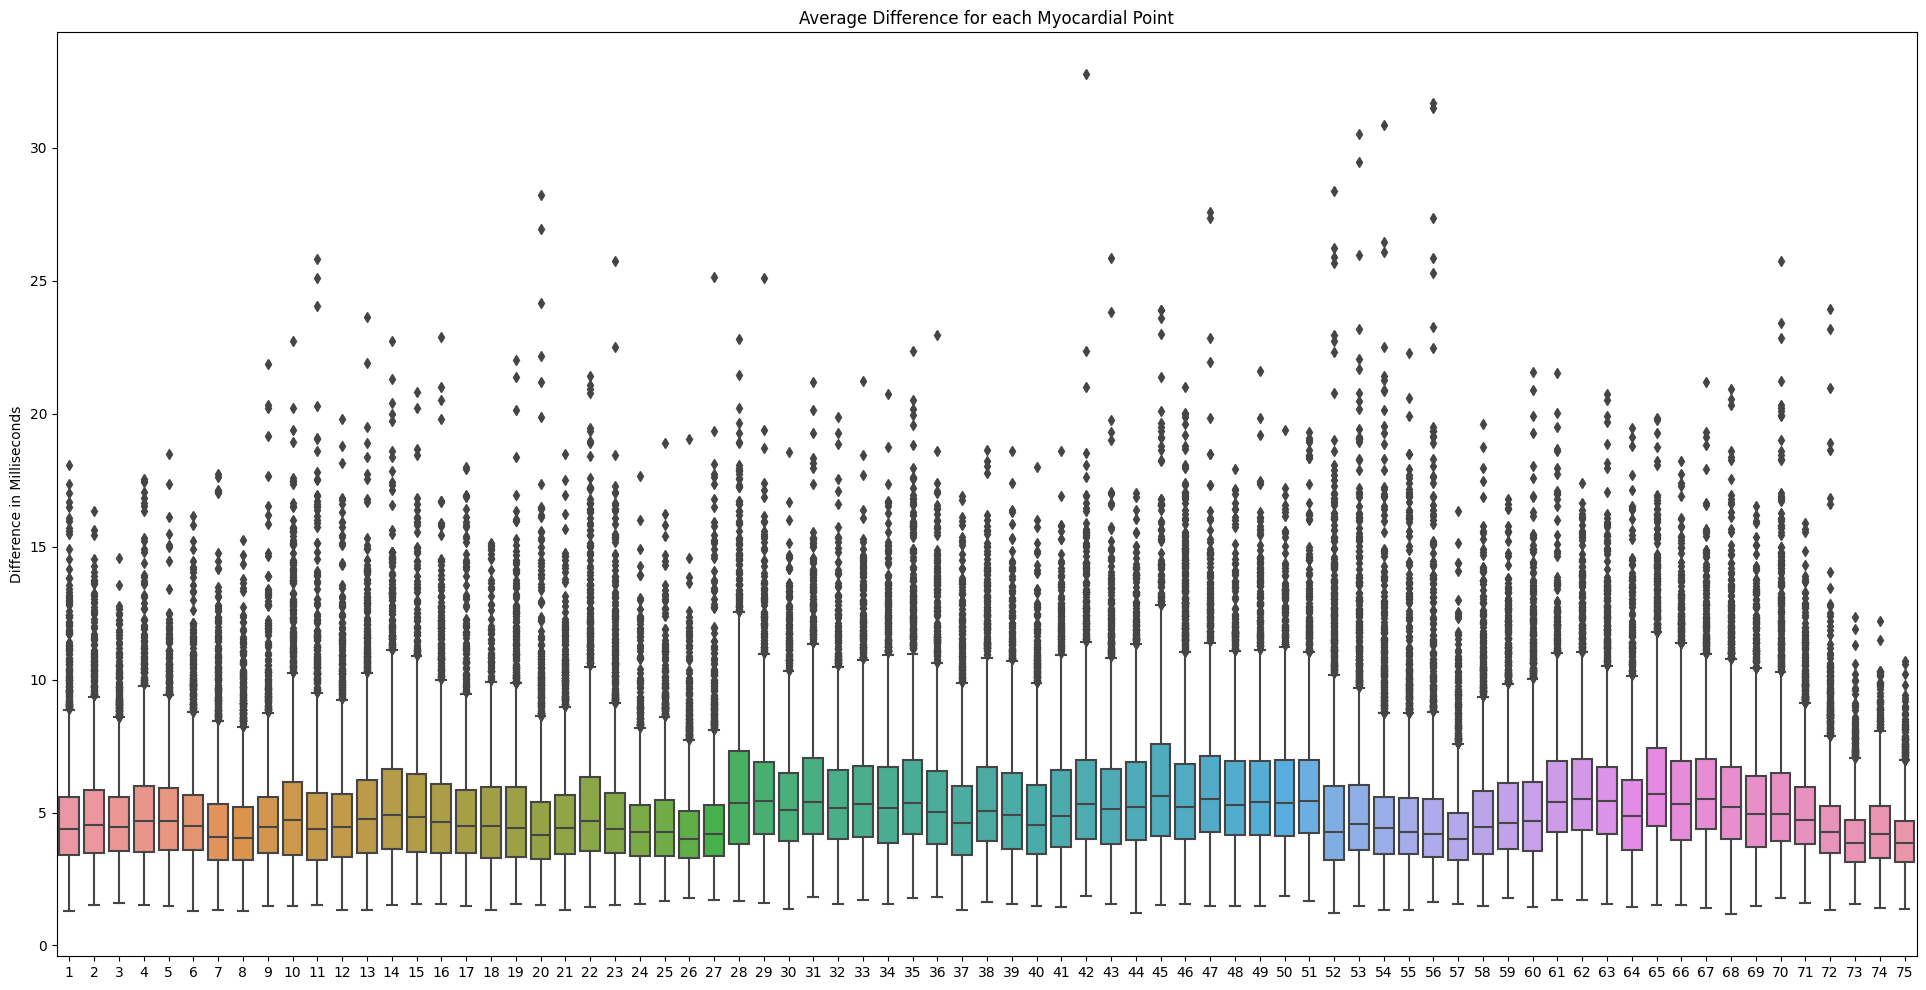

In [ ]:
box_plots(preds, y_test)